# 0) 준비

In [22]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

import sample_data
from meanshift import mean_shift, mean_shift_with_history

%matplotlib inline

# # PyCharm에서 인터랙티브 창 띄우기
# import matplotlib
# matplotlib.use('TkAgg')

def calc_euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# 1) 데이터 샘플 불러오기

(9, 2)
[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 8.   2. ]
 [10.   2. ]
 [ 9.   3. ]]


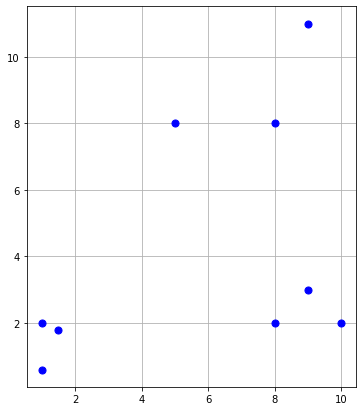

In [23]:
X = sample_data.sample1

# 데이터 확인
print(X.shape)
print(X)

# 좌표에 그리기
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], color='b', s=50, zorder=2)
plt.grid()
# plt.axis([0, 12, 0, 12])
plt.gca().set_aspect("equal")
plt.show()

# 2) Meanshif 알고리즘을 이용한 군집화 수행

In [ ]:
# meanshift 수행
bandwidth = 4
centroids = mean_shift(X, bandwidth)

# 군집화 단계 (알고리즘 5-6의 line 12~14에 해당)
final_centroids = np.zeros_like(centroids)
for i in range(len(centroids)):
    in_bandwidth = []
    for j in range(len(centroids)):
        if calc_euclidean_distance(centroids[i], centroids[j]) <= bandwidth:
            in_bandwidth.append(centroids[j])

    final_centroids[i] = np.average(in_bandwidth, axis=0)
unique_centroids = np.unique(final_centroids, axis=0)

clusters = dict(zip(range(len(unique_centroids)), np.array([unique_centroids[i,:] for i in range(len(unique_centroids))])))
getcluster = lambda val : [k for k,v in clusters.items() if (v == val).sum()==len(val)][0]
df = pd.DataFrame(columns=['Sample_data','Centroids','Clusters'])
df['Sample_data'] = tuple(X)
df['Centroids']   = tuple(final_centroids)
df['Clusters']    = [getcluster(final_centroids[i]) for i in range(len(final_centroids))]
df

In [ ]:
# 그래프에 결과 그리기
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], color='b', s=50, zorder=2)
for c in centroids:
    plt.scatter(unique_centroids[:, 0], unique_centroids[:, 1], color='r', marker='x', s=50, zorder=2)
plt.grid()
# plt.axis([0, 12, 0, 12])
plt.gca().set_aspect("equal")
plt.show()

# +) 중심점 업데이트 내역 확인하기

In [ ]:
# meanshift 수행
bandwidth = 4
centroids, history = mean_shift_with_history(X, bandwidth)

# 중심점 업데이트 내역 테이블 생성
hist = copy.deepcopy(history)
centroids = np.round(centroids, 2)
n_iter = max([len(arr) for arr in hist.values()])
columns = ['Sample_data', 'Centroids']
for i in range(n_iter):
    columns.append('Iter #%d' % i)
df = pd.DataFrame(columns=columns)

for i in range(len(X)):
    n = len(hist[i])
    
    for j in range(n_iter):
        if j < n:
            hist[i][j] = (round(hist[i][j][0], 2), round(hist[i][j][1], 2))
        else:
            hist[i].append('')

df['Sample_data'] = tuple(X)
df['Centroids']   = tuple(centroids)
for i in range(n_iter):
    points = [hist[j][i] for j in range(len(X))]
    df['Iter #%d' % i] = tuple(points)

df

In [ ]:
# 중심점 업데이트 내역 시각화
hist = copy.deepcopy(history)
for i in range(len(X)):
    n = len(hist[i])
    
    for j in range(n_iter):
        if j < n:
            hist[i][j] = (round(hist[i][j][0], 2), round(hist[i][j][1], 2))
        else:
            hist[i].append(hist[i][-1])
                
for i in range(n_iter):
    plt.figure(figsize=(7, 7))
    
    for j in range(len(X)):
        plt.scatter(X[:,0], X[:,1], color='b', marker='o',  s=30, zorder=1)
        plt.scatter(hist[j][i][0], hist[j][i][1], color='r', marker='x',  s=15, zorder=2)
    plt.title('iteration %d'%i)
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show() 